
# **30-Day Journey with Apache Spark⚡Day 7**
## **Day 7: Narrow and Wide Transformations🔄**

#### Welcome to Day 7 of the PySpark series! Today, we will focus on **Narrow and Wide Transformations** – two fundamental concepts that impact how Spark organizes tasks and distributes data. Understanding the difference between these two types is crucial as **they directly affect data movement** (also known as "shuffling") across the cluster.

---

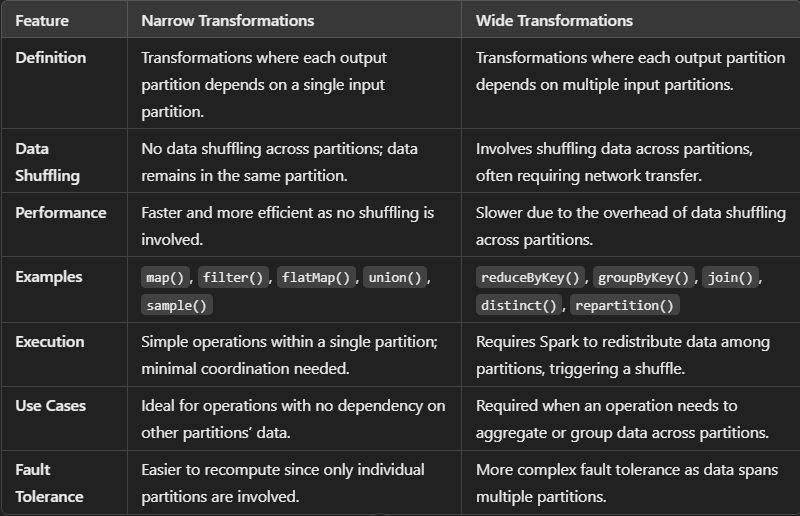

---

### **Overview of Transformations in Spark** ⚡
#### In Spark, **a transformation is an operation applied to an RDD (or DataFrame) that produces a new RDD (or DataFrame) without modifying the original data.** Transformations can be either narrow or wide, depending on how the data is accessed and processed.

---

## **1️⃣ Narrow Transformations**
**In narrow transformations, each partition of the parent RDD is used to create exactly one partition of the child RDD**. This does not require data shuffling across nodes, making narrow transformations faster and more efficient.

Examples: `map(), filter(), flatMap()`

🔹 Data Flow: Each partition is processed independently, and there is no need to move data across nodes.

🔹 Advantages: Faster and more efficient as no network I/O occurs.



---

## **2️⃣ Wide Transformations**
**Wide transformations require redistributing data across partitions.** A single partition in the parent RDD can contribute to multiple partitions in the child RDD, leading to data shuffling between nodes in the cluster.

Examples: `groupByKey(), reduceByKey(), join()`

🔹 Data Flow: Data is exchanged between partitions, causing shuffling and network I/O.

🔹 Disadvantages: Consumes more time and resources.

---

### **Why It Matters?**
### **Narrow vs. Wide**
1. **Performance Optimization**: Narrow transformations are faster as they avoid shuffling. Minimizing wide transformations improves performance.

2. **Resource Efficiency**: Wide transformations consume more resources due to network I/O. Knowing when and how to use each type helps manage resources efficiently.


---

### **How Spark Executes Transformations**
#### **Spark organizes transformations into a Directed Acyclic Graph (DAG)** and breaks them down into stages based on the type of transformation:

+ Narrow Transformation: Grouped into a single stage as no shuffling is required.

+ Wide Transformation: Creates new stages due to the need for data exchange across nodes.


---

## **🔑 Key Points:**
🔹 **Narrow Transformation** (e.g., `map(), filter()`): No shuffling, faster execution.

🔹 **Wide Transformation** (e.g., `reduceByKey(), join()`): Requires data shuffling across partitions, reducing performance.

🔹 **Performance Optimization**: Minimize wide transformations whenever possible.

Stay tuned for Day 8, where we’ll dive deeper into Tasks, Jobs, and Stages to explain how Spark schedules and executes distributed tasks. 🚀

----

# **Practice Transformation in PySpark** 💯

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pyspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [3]:
from pyspark.sql import SparkSession
# Creat a Spark session
spark = SparkSession.builder.appName("PySpark in Colab").getOrCreate()
# Print Spark Version
print(spark.version)

3.5.3




---



## **Narrow Transformation with `map()`**

In [5]:
from pyspark import SparkContext, SparkConf

# define config
conf = SparkConf().setAppName("ExampleApp").setMaster("local")
# Get an existing SparkContext
sc = SparkContext.getOrCreate(conf=conf)

rdd = sc.parallelize([1, 2, 3, 4])
result = rdd.map(lambda x: x*2)
print(result.collect())

# In this example, map() applies a function to each elements of rdd, creating a new RDD

[2, 4, 6, 8]


---

## **Wide Transformation with `reduceByKey()`**

In [8]:
from pyspark import SparkContext, SparkConf

# Create a SparkConf object
conf = SparkConf().setAppName("ExampleApp").setMaster("local")

# Get or create a SparkContext
sc = SparkContext.getOrCreate(conf=conf)
rdd = sc.parallelize([("a", 1), ("b", 1), ("a", 1), ("b", 1)])
result = rdd.reduceByKey(lambda x, y: x+y)
print(result.collect())

# In this example, reduceByKey() groups all values with the samekey and sum them.

[('b', 2), ('a', 2)]
